# Detección de Idiomas

El proyecto aborda un problema de clasificación supervisada en el ámbito del
procesamiento de lenguaje natural (NLP). El objetivo principal es construir un modelo que,
dado un texto, prediga a cuál de los 22 idiomas predefinidos pertenece.

### Dataset

El dataset utilizado es [Language Detect Artificial Intelligence Software](https://www.kaggle.com/datasets/emirhanai/language-detect-artificial-intelligence-software/data) de Kaggle.
Cuenta con 22000 registros, cada registro incluye dos columnas:

 - Text: La frase o cadena en uno de los 22 idiomas.
 - Language: La etiqueta correspondiente al idioma de la frase.

Se incluyen los siguientes idiomas: Estonio, Sueco, Inglés, Ruso, Rumano, Persa, Pashto, Español, Hindi, Coreano, Chino, Francés, Portugués, Indonesio, Urdú, Latín, Turco, Japonés, Neerlandés, Tamil, Tailandés, Árabe.

### 0. Importar librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

os.makedirs("plots", exist_ok=True)

Matplotlib is building the font cache; this may take a moment.


### 1. Cargar el dataset y explorar los datos

In [17]:
df = pd.read_csv("language_detection.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   Language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [16]:
df.describe()

,Text,Language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [18]:
df.groupby('Language').describe()

Text                                                            \
           count unique                                                top   
Language                                                                     
Arabic      1000    998  يعمل الإنترنت بشكل جزئي وذلك بسبب البروتوكولات...   
Chinese     1000   1000  年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...   
Dutch       1000    996  bij de volkstelling in  werd het aantal inwone...   
English     1000   1000  the total high school population was now appro...   
Estonian    1000    999  aastakümned  aastad  aastad  aastad  aastad  a...   
French      1000    990  lévolution du nombre dhabitants est connue à t...   
Hindi       1000    990   ईसा पूर्व ईसा मसीह के जन्म से पूर्व के वर्षों...   
Indonesian  1000    975  bisby fa roskov yr orrell tm nicolson d paglin...   
Japanese    1000   1000  mozilla add-ons は、mozilla firefox、mozilla thun...   
Korean      1000   1000  세기부터 세기까지 고전 포르투갈어의 두 번째 시기는 대항해 시대와 맞물려 아시아와 ...   
Latin       1000    953  haec commentatio automatice praeparata res ast...   
Persian     1000   1000  مهمترین کارخانه‌های شهر کرمانشاه عبارتند از کا...   
Portugese   1000    997  segundo o censo norte-americano de  a sua popu...   
Pushto      1000    993  خواص - نسبتا اسيدي خواص لري په اوبو کى منحل دي...   
Romanian    1000   1000   aprilie sonda spațială messenger a nasa și-a ...   
Russian     1000    999  обеспечение совместно со структурными подразде...   
Spanish     1000    996  moyle p y j cech fishes an introduction to ich...   
Swedish     1000    992  inlandsklimat råder i trakten årsmedeltemperat...   
Tamil       1000    981  இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட...   
Thai        1000   1000  ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...   
Turkish     1000   1000  molla nasreddinin kurucusu celil memmedgülüzad...   
Urdu        1000   1000  ذیل میں دیوبند کی خدمات اور کردار کا تفصیلی جا...   

                 
           freq  
Language         
Arabic        2  
Chinese       1  
Dutch         5  
English       1  
Estonian      2  
French        7  
Hindi         6  
Indonesian   12  
Japanese      1  
Korean        1  
Latin        48  
Persian       1  
Portugese     2  
Pushto        2  
Romanian      1  
Russian       2  
Spanish       5  
Swedish       3  
Tamil        17  
Thai          1  
Turkish       1  
Urdu          1

In [19]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

### 2. Visualizar la distribución de idiomas en el dataset

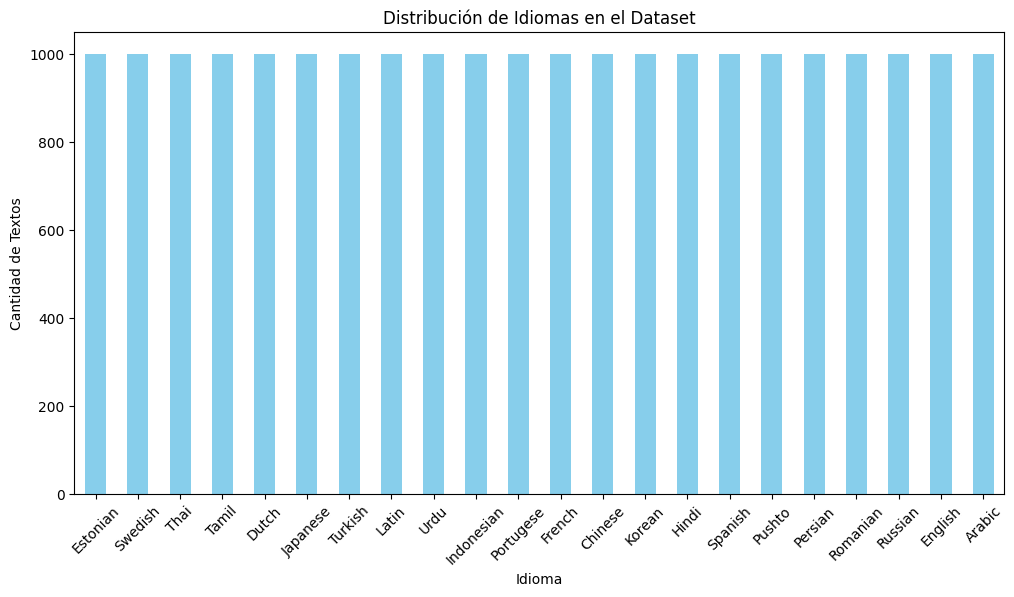

In [5]:
language_counts = df['Language'].value_counts()

plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title("Distribución de Idiomas en el Dataset")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de Textos")
plt.xticks(rotation=45)
plt.savefig("plots/language_distribution.png")
plt.show()

### 3. Analizar la longitud de los textos por idioma

<Figure size 1400x600 with 0 Axes>

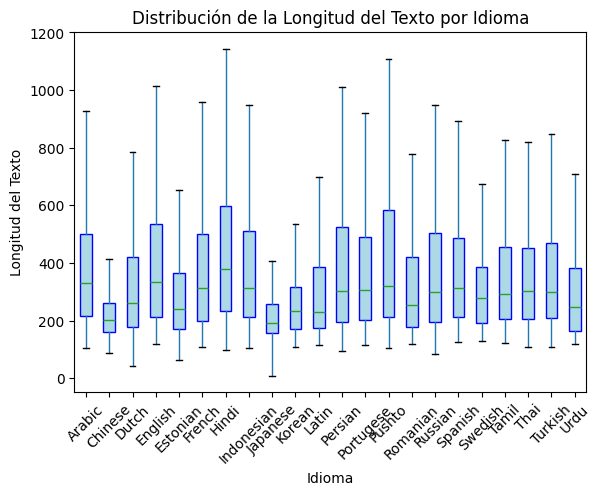

In [6]:
df['Text_length'] = df['Text'].str.len()

plt.figure(figsize=(14, 6))
df.boxplot(column='Text_length', by='Language', grid=False, showfliers=False, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'))
plt.title("Distribución de la Longitud del Texto por Idioma")
plt.suptitle("")
plt.xlabel("Idioma")
plt.ylabel("Longitud del Texto")
plt.xticks(rotation=45)
plt.savefig("plots/text_length_distribution.png")
plt.show()

### 4. Generar nubes de palabras para idiomas específicos

**En inglés**

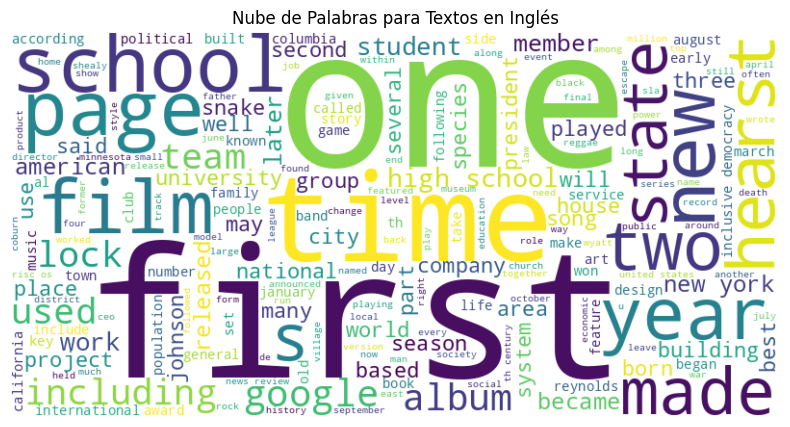

In [7]:
english_texts = " ".join(df[df['Language'] == 'English']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(english_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras para Textos en Inglés")
plt.savefig("plots/english_wordcloud.png")
plt.show()

**En español**

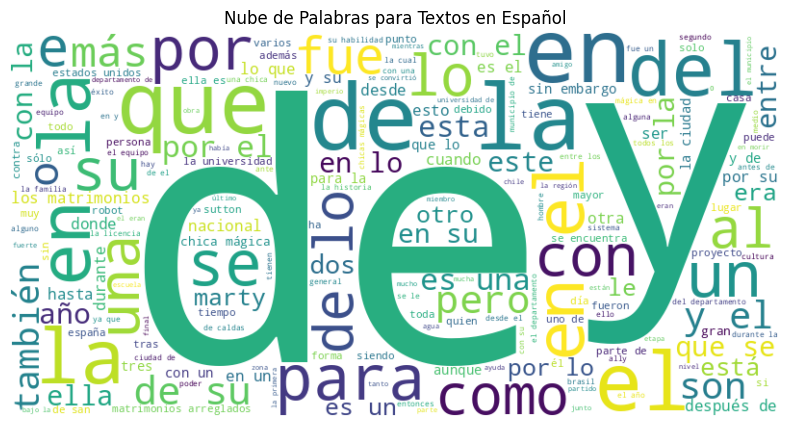

In [8]:
spanish_texts = " ".join(df[df['Language'] == 'Spanish']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spanish_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras para Textos en Español")
plt.savefig("plots/spanish_wordcloud.png")
plt.show()